Generate  tones in adjacent output channels.  Scan by the bandwidth of the output channel. This produces a "continuous" scan.

With no calibration applied, the variation of amplitude and fast phase evolution with frequency is evident.

In [1]:
import importlib
import Mkids
import numpy as np
import matplotlib.pyplot as plt
from MkidsSoc import *
mkidsSoc = MkidsSoc(force_init_clks=False)

In [106]:
importlib.reload(Mkids)
mkids = Mkids.Mkids(mkidsSoc)


In [107]:
# Place the mixer so the output frequencies are centered on range of input frequencies
fMixer = mkids.fsIn/2
mkids.setFMixer(fMixer)


In [114]:
# Choose a tone frequency.  Find its output channel.
# Get three frequencies to center on three consecutive output channels.
fTone = fMixer + mkids.fsOut/np.pi + 0.523
outCh = mkids.outFreq2ch(fTone)
outChs = np.array([outCh-1, outCh, outCh+1])
print("outChs =",outChs)
toneFreqs = mkids.outCh2FreqCenter(outChs)
toneAmplitudes = np.ones(len(toneFreqs))*0.9/len(toneFreqs)
np.random.seed(12394321)
toneFis = 2* np.pi * np.random.uniform(size=len(toneFreqs))

bandwidth = mkids.fcOut
nMeas = 50
nt = 1
#mkids.setMultiTones(toneFreqs, toneAmplitudes, toneFis, fMixer, verbose=True)
mts = mkids.multiToneScan(toneFreqs, toneAmplitudes, toneFis, 
                    bandwidth, nMeas, fMixer, nt, verbose=False, doProgress=True)


outChs = [162 163 164]


  0%|          | 0/50 [00:00<?, ?it/s]

In [115]:
print(toneFreqs)
print(bandwidth)

[1348. 1350. 1352.]
2.0


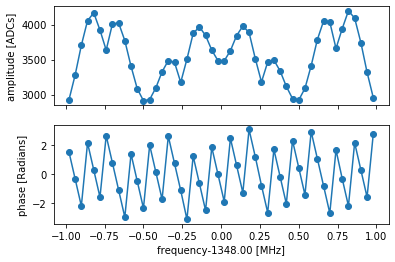

In [116]:
mkids.mtsPlot(mts, 0)

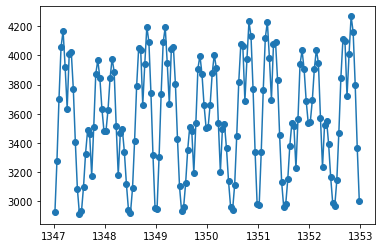

In [117]:
freqs, amps, fis = mkids.mtsUnwind(mts)
plt.plot(freqs,amps, "-o")

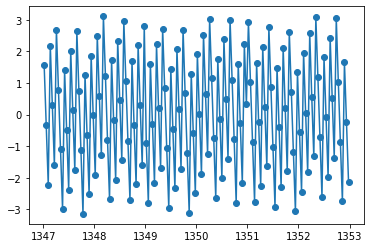

In [118]:
plt.plot(freqs,fis, "-o")